In [1]:
from tvb_multiscale.tvb_nest.nest_models.builders.nest_factory import load_nest, compile_modules

In [2]:
compile_modules("izhikevich_hamker")

2020-11-23 16:26:49,754 - INFO - tvb_multiscale.tvb_nest.nest_models.builders.nest_factory - Preparing MYMODULES_BLD_DIR: /home/docker/packages/nest_modules_builds
2020-11-23 16:26:49,754 - INFO - tvb_multiscale.tvb_nest.nest_models.builders.nest_factory - Preparing MYMODULES_BLD_DIR: /home/docker/packages/nest_modules_builds
2020-11-23 16:26:49,786 - INFO - tvb_multiscale.tvb_nest.nest_models.builders.nest_factory - Copying module sources from /home/docker/packages/tvb-multiscale/tvb_multiscale/tvb_nest/nest/modules/izhikevich_hamker
into /home/docker/packages/nest_modules_builds/izhikevich_hamker...
2020-11-23 16:26:49,786 - INFO - tvb_multiscale.tvb_nest.nest_models.builders.nest_factory - Copying module sources from /home/docker/packages/tvb-multiscale/tvb_multiscale/tvb_nest/nest/modules/izhikevich_hamker
into /home/docker/packages/nest_modules_builds/izhikevich_hamker...
2020-11-23 16:26:49,900 - INFO - tvb_multiscale.tvb_nest.nest_models.builders.nest_factory - Compiling izhikev

In [3]:
nest = load_nest()
nest.Install("izhikevich_hamkermodule")

2020-11-23 16:27:14,604 - INFO - tvb_multiscale.tvb_nest.nest_models.builders.nest_factory - Loading a NEST instance...
2020-11-23 16:27:14,604 - INFO - tvb_multiscale.tvb_nest.nest_models.builders.nest_factory - Loading a NEST instance...
2020-11-23 16:27:14,616 - INFO - tvb_multiscale.tvb_nest.nest_models.builders.nest_factory - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2020-11-23 16:27:14,616 - INFO - tvb_multiscale.tvb_nest.nest_models.builders.nest_factory - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2020-11-23 16:27:14,627 - INFO - tvb_multiscale.tvb_nest.nest_models.builders.nest_factory - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2020-11-23 16:27:14,627 - INFO - tvb_multiscale.tvb_nest.nest_models.builders.nest_factory - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2020-11-23 16:27:14,640 - INFO - tvb_multiscale.tvb_nest.nest_models.builders.nest_factory - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/do

In [ ]:
# nest.Models()

In [4]:
from copy import deepcopy
params_common = {"E_rev_AMPA": 0.0, "E_rev_GABA_A": -90.0, "V_th": 30.0, "c": -65.0,
                 "C_m": 1.0, "I_e": 0.0,
                 "t_ref": 10.0, "tau_rise": 1.0, "tau_rise_AMPA": 10.0, "tau_rise_GABA_A": 10.0,
                 "n0": 140.0, "n1": 5.0, "n2": 0.04}
paramsI = deepcopy(params_common)
paramsI.update({"a": 0.005, "b": 0.585, "d": 4.0})
paramsE = deepcopy(params_common)
paramsStr = deepcopy(params_common)
paramsStr.update({"V_th": 40.0, "C_m": 50.0,
                  "n0": 61.65, "n1": 2.59, "n2": 0.02,
                  "a": 0.05, "b": -20.0, "c": -55.0, "d": 377.0})

In [5]:
exc1 = nest.Create("izhikevich_hamker", 1, params=paramsE)

In [6]:
stimE = nest.Create("poisson_generator", 1, params={"rate": 10.0, "origin": 0.0, "start": 0.1})
nest.Connect(stimE, exc1, syn_spec={'weight': -1.0, 'delay': 1.0, "receptor_type": 0})

In [7]:
record_from = ["V_m", "U_m", "I_syn", "I_syn_ex", "I_syn_in", "g_L", "g_AMPA", "g_GABA_A"]
n_vars = len(record_from)
exc1_mltr = nest.Create("multimeter", 1, params={"record_from": record_from, "interval": 1.0})
nest.Connect(exc1_mltr, exc1)
exc1_spikes_rec = nest.Create("spike_recorder", 1)
nest.Connect(exc1, exc1_spikes_rec)

In [8]:
simulation_time = 10000.0 # ms
nest.Prepare()
nest.Run(simulation_time)

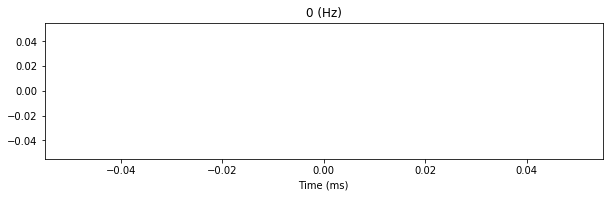

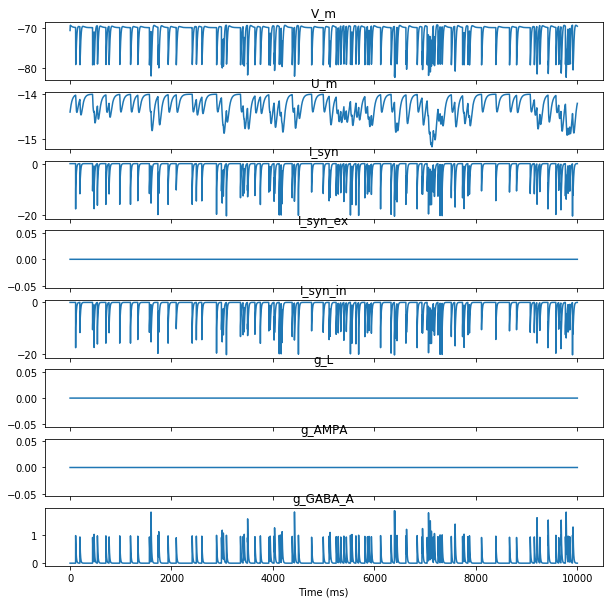

In [9]:
from matplotlib import pyplot
pyplot.close("all")
exc1_spikes = nest.GetStatus(exc1_spikes_rec)[0]["events"]
rate = len(exc1_spikes["times"]) / simulation_time * 1000
f1 = pyplot.figure(figsize=(10, 2.5))
pyplot.plot(exc1_spikes["times"], exc1_spikes["senders"], ".")
pyplot.xlabel("Time (ms)")
pyplot.title("%g (Hz)" % rate)
pyplot.show()
exc1_ts = nest.GetStatus(exc1_mltr)[0]["events"]
f2, axes = pyplot.subplots(n_vars, 1, sharex=True, figsize=(10, 10))
for i_var, var in enumerate(record_from):
    varts = exc1_ts[var]
    ts = exc1_ts["times"]
    axes[i_var].plot(ts, varts)
    axes[i_var].set_title(var)
axes[-1].set_xlabel("Time (ms)")
pyplot.show()

In [10]:
exc1_ts["V_m"].max()

-69.30176805762581

In [11]:
nest.GetDefaults("izhikevich_hamker")

{'a': 0.02,
 'archiver_length': 0,
 'available': (999,),
 'b': 0.2,
 'beta_Ca': 0.001,
 'C_m': 1.0,
 'Ca': 0.0,
 'c': -72.0,
 'capacity': (1000,),
 'consistent_integration': True,
 'd': 6.0,
 'E_rev_AMPA': 0.0,
 'E_rev_GABA_A': -90.0,
 'element_type': 'neuron',
 'elementsize': 704,
 'frozen': False,
 'g_AMPA': 0.0,
 'g_GABA_A': 0.0,
 'g_L': 0.0,
 'global_id': 0,
 'I': 0.0,
 'I_e': 0.0,
 'I_syn': 0.0,
 'I_syn_ex': 0.0,
 'I_syn_in': 0.0,
 'instantiations': (1,),
 'local': True,
 'model': 'izhikevich_hamker',
 'node_uses_wfr': False,
 'post_trace': 6.013469535307721e-154,
 'receptor_types': {'activity': 0, 'noise': 1},
 'recordables': ('g_AMPA',
  'g_GABA_A',
  'g_L',
  'I',
  'I_syn',
  'I_syn_ex',
  'I_syn_in',
  'U_m',
  'V_m'),
 'synaptic_elements': {},
 't_ref': 10.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_rise': 1.0,
 'tau_rise_AMPA': 10.0,
 'tau_rise_GABA_A': 10.0,
 'thread': 0,
 'thread_local_id': -1,
 'type_id': 'izhikevich_ha